1. 선형회귀 (Linear Regression)

기울기 w: [-0.05829418]
절편 b: 3.4003072894040876
MSE : 0.13961895650579026
RMSE: 0.3736562009465255
MAE : 0.2871998794781653
R²  : 0.024098626473972762


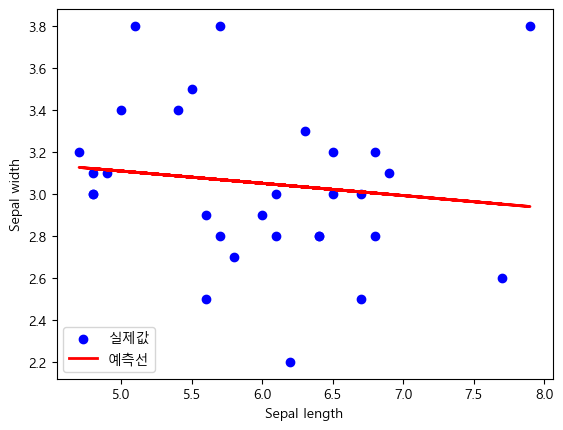

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 데이터
iris = load_iris()
X = iris.data[:, [0]] # sepal(꽃받침) length
y = iris.data[:, 1] # sepal width

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)

# 모델 학습
reg = LinearRegression()
reg.fit(X_train, y_train)

# 예측
y_pred = reg.predict(X_test)

# 평가
print("기울기 w:", reg.coef_)
print("절편 b:", reg.intercept_)
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) # cm
print("MAE :", mean_absolute_error(y_test, y_pred)) # cm
print("R²  :", r2_score(y_test, y_pred))

# 시각화
plt.scatter(X_test, y_test, color="blue", label="실제값")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="예측선")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()
plt.show()

기울기 w: -0.058 <br>
절편 b: 3.40<br>
y = -0.058x + 3.40<br>
=> 입력변수 x가 1 증가할 때마다 예측값은 평균적으로 0.058 감소 (오차 3.40)<br>
<br>
RMSE: 0.374 -> 평균적으로 약 0.37cm정도 틀림<br>
MAE: 0.287 -> 평균적으로 약 0.29cm 정도 차이가 남<br>
=> 둘 다 비슷한 값이므로 이상치 크지 않다<br>
<br>
설명력 R²: 0.024 ~> 거의 0에 가까움<br>
=> 사실상 데이터 평균값 찍는 거랑 큰 차이 없음. 즉, 선형회귀 직선이 패턴을 잘 못 잡고 있음<br>

- 직선을 그렸지만 데이터패턴 설명력이 매우 낮다
- 오차는 soso, but 데이터 자체의 분산이 크지 않아서 생긴 착시일 수 있음



결론! 꽃받침 길이만으로 꽃받침 너비 예측 힘들다 <br>
: 선형으로 설명하기 힘듦 -> 비선형(변수 다수) 필요

<br><br><br>
2. 로지스틱 회귀 (Logistic Regression)

정확도: 0.7333333333333333
혼동행렬:
[[10  0  0]
 [ 0  5  5]
 [ 0  3  7]]
분류 리포트:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.62      0.50      0.56        10
   virginica       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



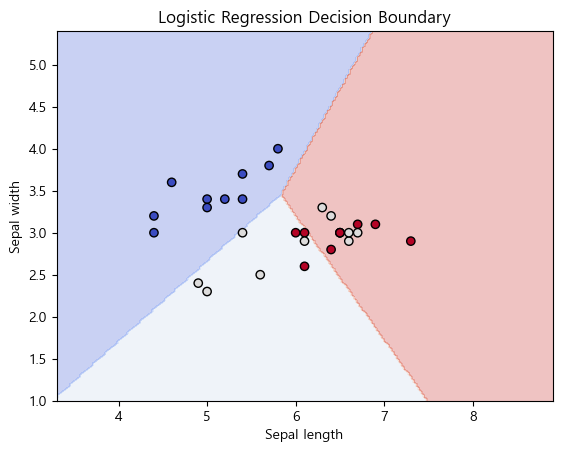

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# 데이터 로드
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(  
  X, y, test_size=0.2, random_state=42, stratify=y
)

# 학습
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# 평가
y_pred = clf.predict(X_test)
print("정확도:", accuracy_score(y_test, y_pred))
print("혼동행렬:", confusion_matrix(y_test, y_pred), sep='\n')
print("분류 리포트:", classification_report(y_test, y_pred, target_names=iris.target_names), sep='\n')

# 결정경계 시각화
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # np.c_ ~= np.column_stack()
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Logistic Regression Decision Boundary")
plt.show()


c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


정확도: 0.9333333333333333
혼동행렬:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
분류리포트:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



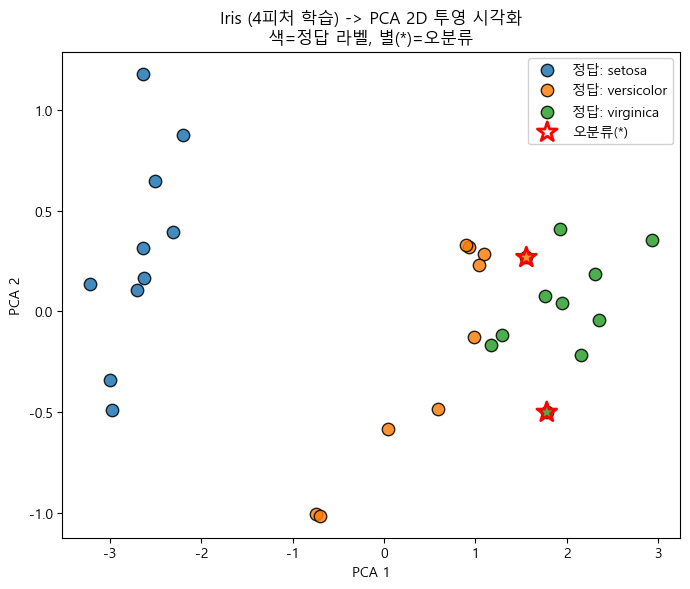

In [1]:
# 4 피처 사용 -> PCA로 차원축소 후 시각화
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42, stratify=y
)

"""
모델: 스케일링 + 로지스틱(Softmax) 파이프라인
- 스케일링 : 각 피처(sepal/petal)의 값 범위가 다름
          -> StandardScaler로 평균 0, 표준편차 1로 변환
- 파이프라인 : 전처리(스케일링)+ 모델링 한묶음으로! -> 안전+깔끔
"""
clf = Pipeline([
  ("scaler", StandardScaler()),
  ("logreg", LogisticRegression(max_iter=500, multi_class="multinomial")) # Softmax 방식 선택
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("정확도:", accuracy_score(y_test, y_pred))
print("혼동행렬:", confusion_matrix(y_test, y_pred), sep='\n')
print("분류리포트:", classification_report(y_test, y_pred, target_names=iris.target_names), sep='\n')

# 시각화 목적 PCA (2D 투영)
# 전체 X로 PCA를 fit한 뒤 train/test 모두 같은 변환 적용(직관적)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# test에 해당하는 2D 좌표만 뽑기
X_test_2d = pca.transform(X_test)

# 2D 산점도로 시각화

plt.figure(figsize=(7,6))

colors = ['tab:blue', 'tab:orange', 'tab:green'] # 클래스별 컬러
labels = iris.target_names # 클래스별 라벨

# 정답 표시
for cls, color, label in zip([0,1,2], colors, labels):
  mask = (y_test == cls)
  plt.scatter(
    X_test_2d[mask, 0], X_test_2d[mask, 1],
    c=color, edgecolor='k', s=80, alpha=0.85, label=f"정답: {label}" # s : 점 크기
  )

# 오분류 표시(별표)
mis = (y_test != y_pred)
if mis.any():
  plt.scatter(
    X_test_2d[mis, 0], X_test_2d[mis, 1],
    marker='*', s=220, facecolors='none', edgecolors='red', linewidths=2, # facecolors : 안쪽 채움
    label="오분류(*)"
  )

plt.title("Iris (4피처 학습) -> PCA 2D 투영 시각화\n"
          "색=정답 라벨, 별(*)=오분류")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(loc="best", framealpha=0.9)
plt.tight_layout()
plt.show()

3. 결정트리 (Decision Tree)

Accuracy: 0.9777777777777777
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



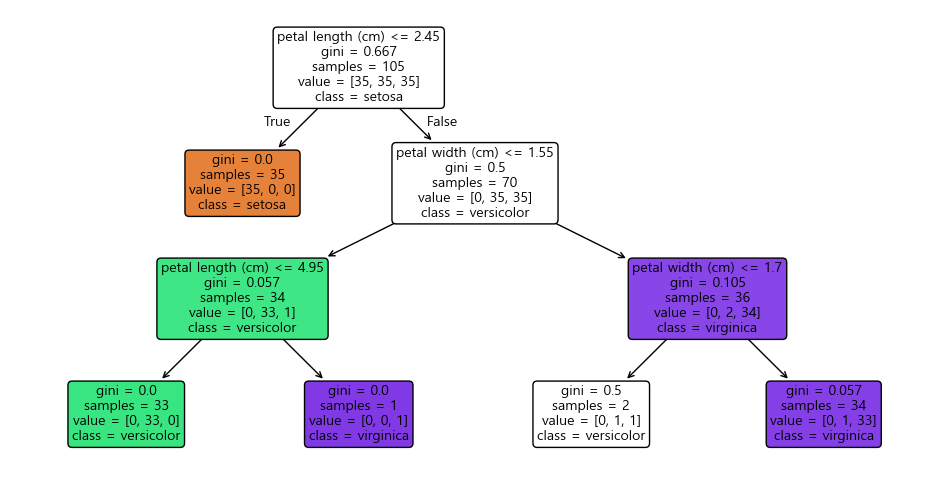

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

# 모델 max_depth=3으로 제한 (과적합 방지)
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred), sep='\n')
print("Classification Report:", classification_report(y_test, y_pred, target_names=iris.target_names), sep='\n')

# 트리 시각화
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True, fontsize=10)
plt.show()

In [2]:
# 결정트리 vs 랜덤포레스트 vs 그래디언트부스팅
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

iris = load_iris()
X, y = iris.data, iris.target

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"acc": "accuracy", "f1_macro": "f1_macro"}

models = {
  "DecisionTree": DecisionTreeClassifier(max_depth=None, random_state=42), # 앙상블은 전처리 필요X
  "RandomForest" : RandomForestClassifier(
      n_estimators=200, # 트리 개수 (기본 100, 안전성 위해 200)
      max_depth=None,
      n_jobs=-1,
      random_state=42
  ),
  "GradientBoosting": GradientBoostingClassifier(
    n_estimators=200, # 약한 학습기(작은 트리) 개수
    learning_rate=0.05, # 학습률(작을수록 보수적, 과적합↓)
    max_depth=3, # 각 약한 트리 깊이(작게!)
    random_state=42
  )
}

# 교차검증으로 성능 비교
for name, clf in models.items():
  scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
  print(f"=={name}==")
  print(f"Accuracy: {scores['test_acc'].mean():.3f} ± {scores['test_acc'].std():.3f}")
  print(f"F1-macro: {scores['test_f1_macro'].mean():.3f} ± {scores['test_f1_macro'].std():.3f}")
  print()

# 최종 학습 후 중요도 확인(랜덤포레스트)
rf = models["RandomForest"].fit(X, y)
importances = rf.feature_importances_
for fname, imp in sorted(zip(iris.feature_names, importances), key=lambda x: -x[1]):
  print(f"{fname}:{imp:.3f}")

==DecisionTree==
Accuracy: 0.953 ± 0.034
F1-macro: 0.953 ± 0.034

==RandomForest==
Accuracy: 0.960 ± 0.039
F1-macro: 0.960 ± 0.039

==GradientBoosting==
Accuracy: 0.953 ± 0.034
F1-macro: 0.953 ± 0.034

petal length (cm):0.459
petal width (cm):0.418
sepal length (cm):0.102
sepal width (cm):0.021


4. KNN (K-Nearest Neighbors, K-최근접 이웃)

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix", confusion_matrix(y_test, y_pred), sep='\n')
print("Classification Report", classification_report(y_test, y_pred, target_names=iris.target_names), sep='\n')

Accuracy: 0.9777777777777777
Confusion Matrix
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [13]:
# K 값 변화 실험 (CV)
from sklearn.model_selection import cross_val_score
import numpy as np

for k in [1, 3, 5, 7, 9, 11]:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
  print(f"k={k}, mean acc={scores.mean():.3f}")

k=1, mean acc=0.960
k=3, mean acc=0.967
k=5, mean acc=0.973
k=7, mean acc=0.980
k=9, mean acc=0.973
k=11, mean acc=0.980


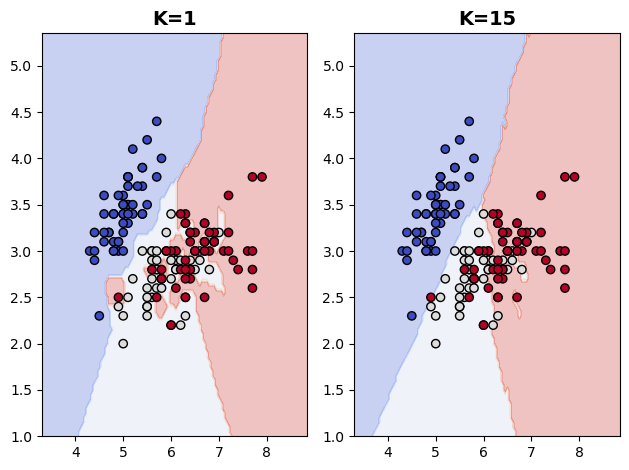

In [11]:
# K=1(과적합)와 K=15(일반화)의 결정경계 차이 시각화
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data[:, :2], iris.target

# 그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# K=1, K=15 두가지 모델 학습
for i, k in enumerate([1, 15]):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X, y)

  # 결정경계 예측
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  plt.subplot(1, 2, i+1)
  plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
  plt.title(f"K={k}", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

5. SVN (서포트 벡터 머신)

Accuracy: 0.7333333333333333
Confusion Matrix:
[[15  0  0]
 [ 0 10  5]
 [ 1  6  8]]
Classification Report:
              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        15
  versicolor       0.62      0.67      0.65        15
   virginica       0.62      0.53      0.57        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



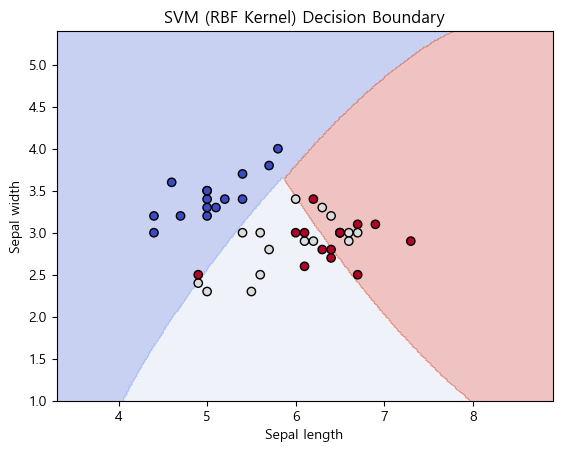

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 시각화 위해 2피처(sepal lenght/width) 사용
iris = load_iris()
X, y = iris.data[:, :2], iris.target

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

# 모델 : RBF 커널 SVM
clf = SVC(kernel="rbf", C=1.0, gamma="scale") # C:규제강도, gamma:커널폭(영향강도)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred), sep='\n')
print("Classification Report:", classification_report(y_test, y_pred, target_names=iris.target_names), sep='\n')

# 결정경계 시각화
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("SVM (RBF Kernel) Decision Boundary")
plt.show()

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLAB

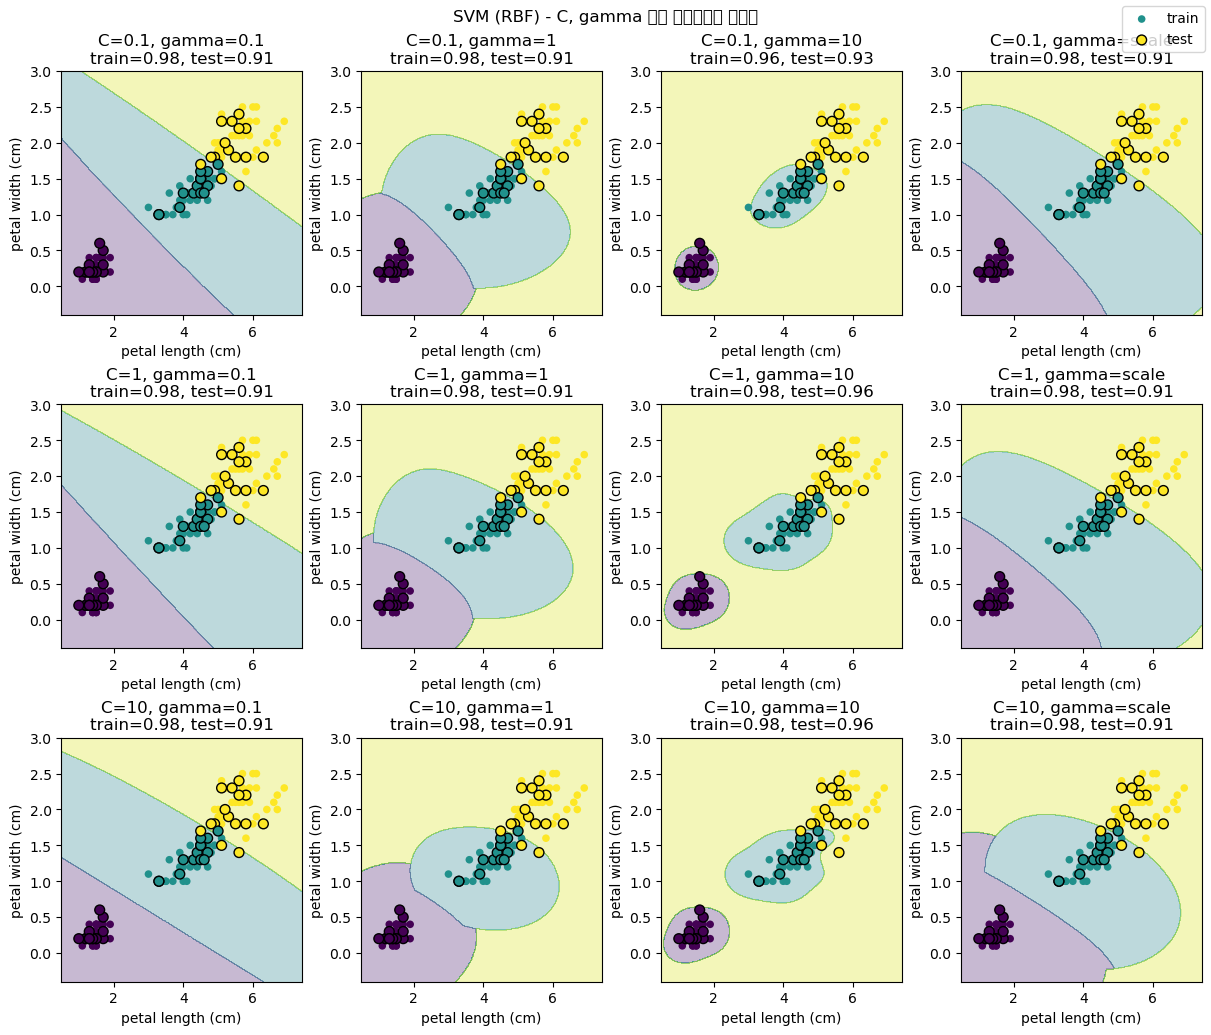

In [12]:
# RBF SVM: C, gamma 변화 따른 결정경계
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
feat_idx = [2, 3] # petal length/width
X, y = iris.data[:, feat_idx], iris.target
feat_names = [iris.feature_names[i] for i in feat_idx]

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx,yy = np.meshgrid(
  np.linspace(x_min, x_max, 400),
  np.linspace(y_min, y_max, 400)
)

def plot_boundary(ax, C, gamma):
  clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=C, gamma=gamma))
  ])
  clf.fit(X_train, y_train)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.3)

  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='none', s=30, label="train")
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=50, label="test")

  y_pred_tr = clf.predict(X_train)
  y_pred_te = clf.predict(X_test)
  tr = accuracy_score(y_train, y_pred_tr)
  te = accuracy_score(y_test, y_pred_te)

  ax.set_title(f"C={C}, gamma={gamma}\ntrain={tr:.2f}, test={te:.2f}")
  ax.set_xlabel(feat_names[0])
  ax.set_ylabel(feat_names[1])

Cs     = [0.1, 1, 10]
gammas = [0.1, 1, 10, "scale"]

fig, axes = plt.subplots(len(Cs), len(gammas), figsize=(12, 10), constrained_layout=True)
for i, C in enumerate(Cs):
  for j, g in enumerate(gammas):
    ax = axes[i, j]
    plot_boundary(ax, C, g)

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
fig.suptitle("SVM (RBF) - C, gamma 따른 결정경계와 정확도", y=1.02, fontsize=12)
plt.show()